In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def perceptron(x, w, b):
  y_in = np.dot(x, w)+b
  y_pred = sigmoid(y_in)
  return y_pred

def sigmoid(y_in):
  y_pred = 1/(1 + np.exp(-y_in))
  return y_pred

def DW(x, y, w, b):
  y_pred = perceptron(x, w, b)
  dw = (y-y_pred)*(1-y_pred)*y_pred*x
  return dw

def DB(x, y, w, b):
  y_pred = perceptron(x, w, b)
  db = (y-y_pred)*(1-y_pred)*y_pred
  return db

sqaured error loss 
 [0.125, 0.25045883182682394, 0.3767971040024927, 0.5044073356609323, 0.6336619027635743, 0.7649192320761677, 0.8985285705790133, 1.0348335698567914, 1.1741748549596356, 1.3168916929985923]


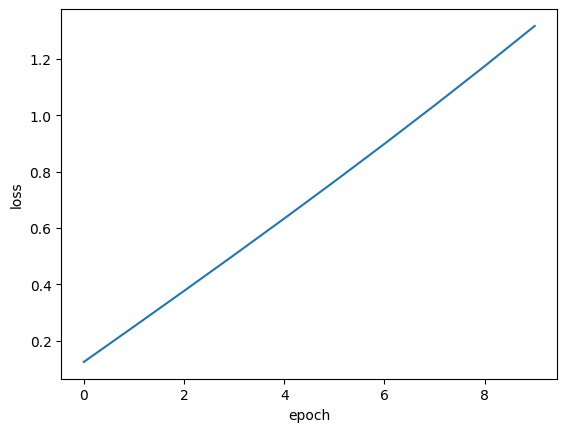

updated weights are  -0.09113331645849387
updated bias is  -0.011869160011010214


In [32]:
def momentum(x, y, w, b, alpha, beta, n):
  weights = 0.0
  bias = 0.0
  error_epoch = 0.0
  errors = []
  for i in range(n):
    dw = 0
    db = 0
    for xi, yi in zip(x, y):
      dw += DW(xi, yi, w, b)
      db += DB(xi, yi, w, b)
      error_epoch += (yi - perceptron(xi, w, b))**2
    weights = weights*beta + dw*(1-beta)
    bias = bias*beta + db*(1-beta)
    errors.append(error_epoch / len(x))
    w -= weights*alpha
    b -= bias*alpha
  print("sqaured error loss \n",errors)
  plt.plot(errors)
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.show()
  return w, b

x = np.array([0.5, 2.5])
y = np.array([0.2, 0.9])
w = 0.0
b = 0.0
alpha = 0.1
beta = 0.9
epoch = 10
new_w, new_b = momentum(x, y, w, b, alpha, beta, epoch)
print("updated weights are ",new_w)
print("updated bias is ",new_b)